<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [6]:
import os

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go

import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)

# ----------------------------------------------------------
# BB Added 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from datetime import datetime
# ----------------------------------------------------------

def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)
        

5.11.0


## Data preparation

In [3]:
df = pd.read_csv('../data/hour_online.csv')
df.shape

(2625, 2)

In [227]:
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [313]:
df.shape
df.dtypes
#df.tail()
df.iloc[-1,:]


(2616, 2)

ds    datetime64[ns]
y              int64
dtype: object

ds    2017-04-20 09:00:00
y                   40763
Name: 2624, dtype: object

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [229]:
df.Time = pd.to_datetime(df.Time)

In [230]:
df.dtypes
df.head()

Time     datetime64[ns]
Users             int64
dtype: object

,Time,Users
0,2017-01-01 00:00:00,34002
1,2017-01-01 01:00:00,37947
2,2017-01-01 02:00:00,41517
3,2017-01-01 03:00:00,44476
4,2017-01-01 04:00:00,46234


In [231]:
# See the min and max values for the time field
df.describe()

,Users
count,2616.000000
mean,40623.163609
std,14130.371110
min,1111.000000
25%,29413.000000
50%,38379.500000
75%,49019.250000
max,110716.000000


In [232]:
plotly_df(df.set_index('Time')[["Users"]])

In [233]:
df.head()

,Time,Users
0,2017-01-01 00:00:00,34002
1,2017-01-01 01:00:00,37947
2,2017-01-01 02:00:00,41517
3,2017-01-01 03:00:00,44476
4,2017-01-01 04:00:00,46234


In [234]:
from fbprophet import Prophet

In [235]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [236]:
train_df = df[:-predictions].copy()

In [237]:
train_df.tail()
train_df.shape

df[2581:2586]
#df.head()

,ds,y
2590,2017-04-18 23:00:00,22520
2591,2017-04-19 00:00:00,23000
2592,2017-04-19 01:00:00,23408
2593,2017-04-19 02:00:00,26398
2594,2017-04-19 03:00:00,30391


(2586, 2)

,ds,y
2590,2017-04-18 23:00:00,22520
2591,2017-04-19 00:00:00,23000
2592,2017-04-19 01:00:00,23408
2593,2017-04-19 02:00:00,26398
2594,2017-04-19 03:00:00,30391


In [238]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [239]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

#future.head()
#future[2590:2595]

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [240]:
future.shape

(2616, 1)

In [241]:
forecast = m.predict(future)
forecast.tail()
#forecast.dtypes
forecast.shape

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35294.171525,36716.743203,48324.679839,35217.821264,35311.138028,7414.534228,7414.534228,7414.534228,8789.630769,8789.630769,8789.630769,-1375.096542,-1375.096542,-1375.096542,0.0,0.0,0.0,42708.705753
2612,2017-04-20 06:00:00,35302.711539,39774.145992,51445.515356,35202.765433,35323.036394,10107.050359,10107.050359,10107.050359,11419.134586,11419.134586,11419.134586,-1312.084227,-1312.084227,-1312.084227,0.0,0.0,0.0,45409.761898
2613,2017-04-20 07:00:00,35311.251553,41421.287756,52775.727301,35199.746970,35333.980029,11957.540088,11957.540088,11957.540088,13204.203773,13204.203773,13204.203773,-1246.663685,-1246.663685,-1246.663685,0.0,0.0,0.0,47268.791641
2614,2017-04-20 08:00:00,35319.791567,43088.080938,54845.497591,35197.462511,35348.457820,13560.055989,13560.055989,13560.055989,14739.107136,14739.107136,14739.107136,-1179.051147,-1179.051147,-1179.051147,0.0,0.0,0.0,48879.847556
2615,2017-04-20 09:00:00,35328.331581,44604.412530,55646.812183,35201.192569,35370.112702,14845.513642,14845.513642,14845.513642,15954.969769,15954.969769,15954.969769,-1109.456128,-1109.456128,-1109.456128,0.0,0.0,0.0,50173.845223


(2616, 19)

In [242]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01 00:00:00,43984.548876,33146.407084,44364.824833,43984.548876,43984.548876,-5094.114327,-5094.114327,-5094.114327,-8485.927160,-8485.927160,-8485.927160,3391.812833,3391.812833,3391.812833,0.0,0.0,0.0,38890.434548
1,2017-01-01 01:00:00,43979.243893,34643.399286,46370.967224,43979.243893,43979.243893,-3796.558249,-3796.558249,-3796.558249,-7087.387963,-7087.387963,-7087.387963,3290.829713,3290.829713,3290.829713,0.0,0.0,0.0,40182.685644
2,2017-01-01 02:00:00,43973.938911,37672.685287,48517.156562,43973.938911,43973.938911,-982.401626,-982.401626,-982.401626,-4160.941534,-4160.941534,-4160.941534,3178.539908,3178.539908,3178.539908,0.0,0.0,0.0,42991.537285
3,2017-01-01 03:00:00,43968.633928,41432.440527,52816.682029,43968.633928,43968.633928,3236.422416,3236.422416,3236.422416,181.058286,181.058286,181.058286,3055.364130,3055.364130,3055.364130,0.0,0.0,0.0,47205.056345
4,2017-01-01 04:00:00,43963.328946,46305.214977,57470.993528,43963.328946,43963.328946,7814.938109,7814.938109,7814.938109,4893.137398,4893.137398,4893.137398,2921.800711,2921.800711,2921.800711,0.0,0.0,0.0,51778.267055


### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- Type your answer here:  38890


In [243]:
# If only hour 00:00:00 is required
#df1stJan17Hour0=forecast[forecast['ds']=='2017-01-01 00:00:00']
#print("The prediction for 1st Jan 17 00:00:00 is ", round(df1stJan17Hour0['yhat']))

date1Jan17='2017-01-01 00:00:00'
df1stJan17Hour0=forecast[forecast['ds']==datetime.strptime(date1Jan17, "%Y-%m-%d %H:%M:%S")]

print("The prediction for 1st Jan 17 00:00:00 is ", round(df1stJan17Hour0['yhat']))

The prediction for 1st Jan 17 00:00:00 is  0    38890.0
Name: yhat, dtype: float64


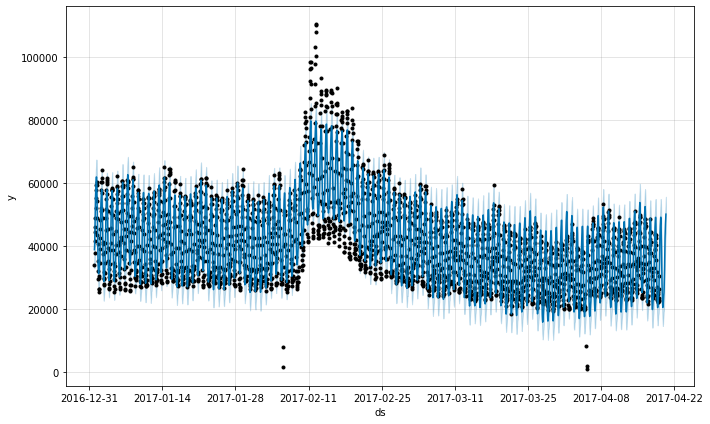

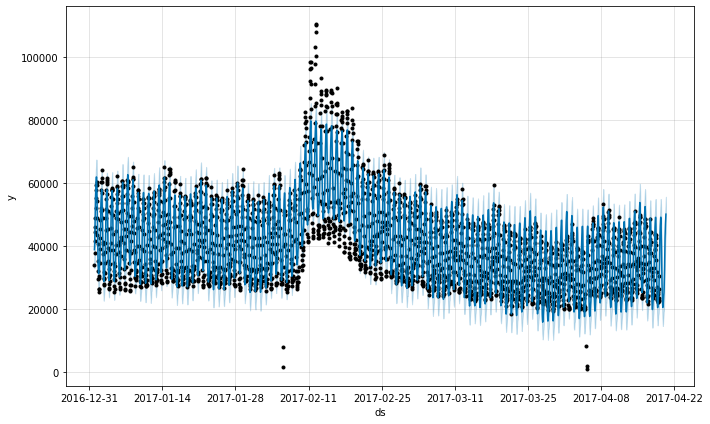

In [72]:
m.plot(forecast)

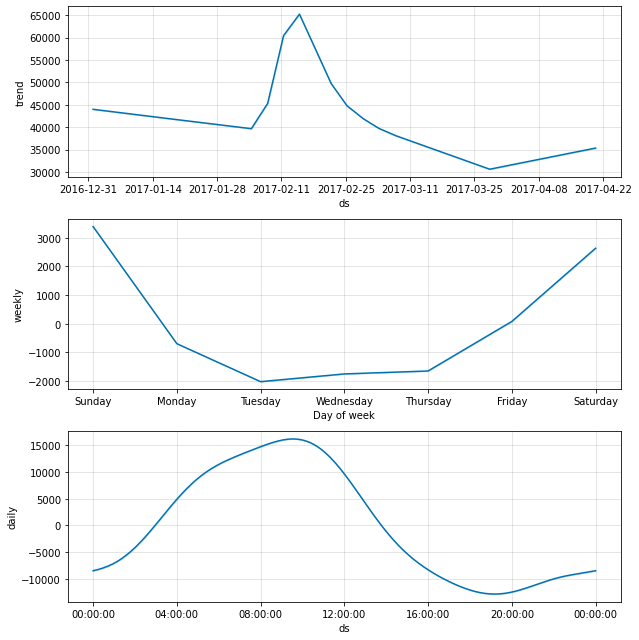

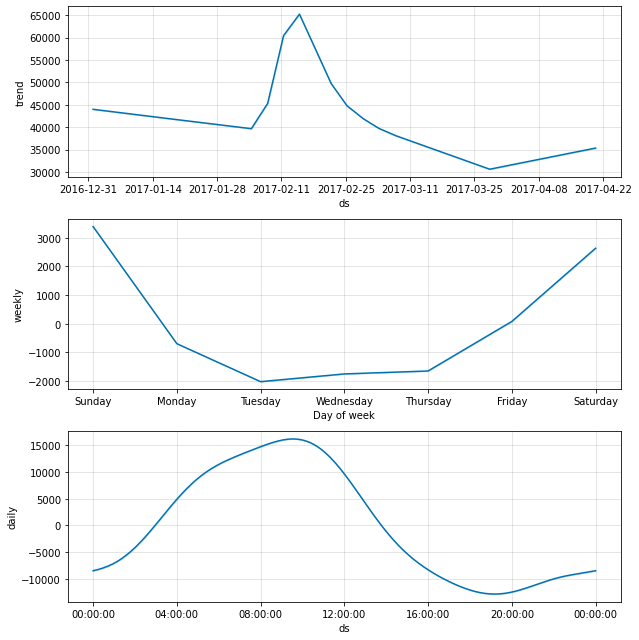

In [244]:
m.plot_components(forecast)

Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- Type your answer here: 

### <font color='red'>Question 3:</font> What is MAE equal to?

- Type your answer here: 


In [245]:
### Check with formula
# np.mean(np.abs((y_true - y_pred) / y_true)) * 100
# sklearn.metrics.mean_absolute_error

# In case we consider both date and hour
quality_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds'))
#quality_df

# Mape - Considering test section [-predictions:]
quality_df['mape'] = 100*(quality_df['y'] - quality_df['yhat']) / quality_df['y']
mapeQ=round(np.mean(abs(quality_df[-predictions:]['mape'])), 2)
print('MAPE is', mapeQ)

# Mae Considering test section [-predictions:]
quality_df['mae'] = quality_df['y'] - quality_df['yhat']
maeQ=round(np.mean(abs(quality_df[-predictions:]['mae'])), 2)
print('MAE is', maeQ)


# Mape - Considering test section [-predictions:]
#quality_df['mape'] = abs(quality_df['y'] - quality_df['yhat']) / quality_df['y']
#mapeQ=round(np.mean(100*quality_df[-predictions:]['mape']), 2)
#print('MAPE is', mapeQ)

# Mae - Considering test section [-predictions:]
#quality_df['mae'] = abs(quality_df['y'] - quality_df['yhat'])
#maeQ=round(np.mean(quality_df[-predictions:]['mae']), 2)
#print('MAE is', maeQ)

MAPE is 12.7
MAE is 4354.8


## Predicting with ARIMA

In [246]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.tsa.api as smt
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: No
- What is p_value? Answer: p = 0.24 (Considering Train DF)

In [247]:
print("Considering Train DF")
resultTDF = sm.tsa.stattools.adfuller(train_df['y'])

print('ADF Statistics: %f' % resultTDF[0])
print('p-value: %f' % resultTDF[1])
print('Critical Values:')
for key, value in resultTDF[4].items():
    print('\t%s: %.3f' % (key, value))
    
print("\nConsidering DF")
result = sm.tsa.stattools.adfuller(df['y'])

print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
print("\nThe series is not stationary, if we assume a threshold of 5%")
print("The p value for the train df is ", resultTDF[1])

Considering Train DF
ADF Statistics: -2.111278
p-value: 0.240004
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

Considering DF
ADF Statistics: -2.072445
p-value: 0.255738
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567

The series is not stationary, if we assume a threshold of 5%
The p value for the train df is  0.24000379825187296


<h3> Exploring 

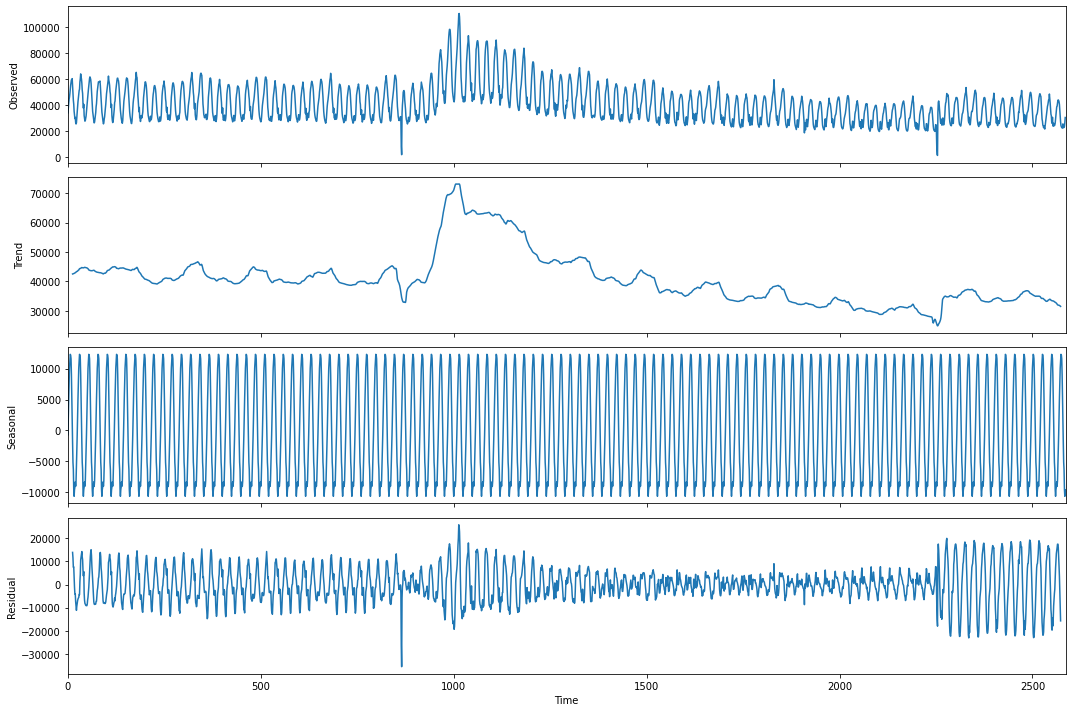

In [248]:
sm.tsa.seasonal_decompose(train_df['y'].values, freq=24).plot();

In [249]:
train_df.set_index('ds', inplace=True)

In [250]:
# Plot the Graphs - Code From Notes

def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

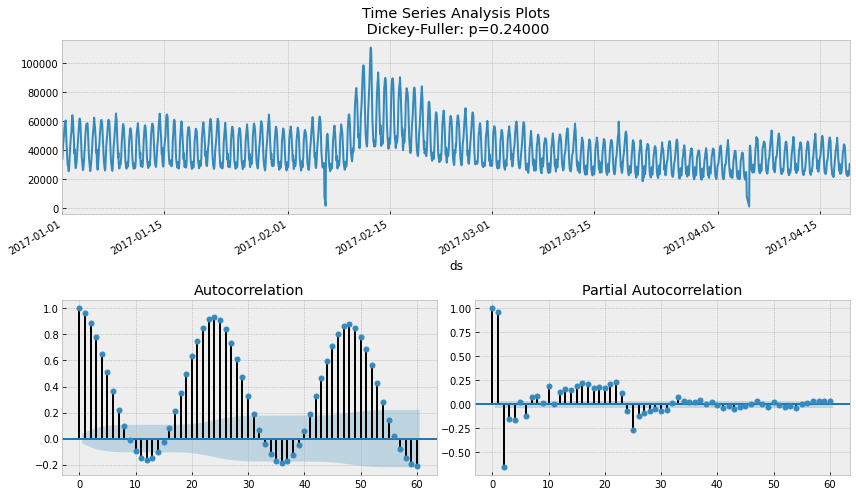

In [251]:
tsplot(train_df['y'], lags=60)

In [252]:
#train_df.set_index('ds', inplace=True)
train_df.head()

,y
ds,
2017-01-01 00:00:00,34002
2017-01-01 01:00:00,37947
2017-01-01 02:00:00,41517
2017-01-01 03:00:00,44476
2017-01-01 04:00:00,46234


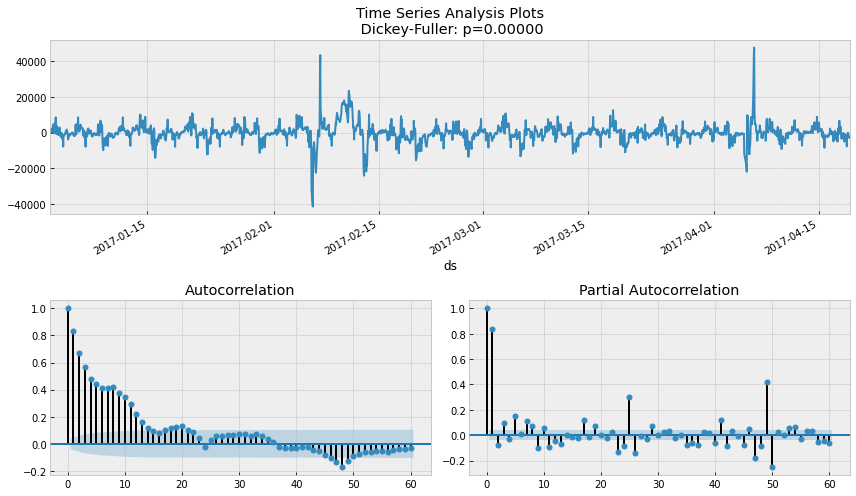

In [253]:
# Remove seasonality
train_df['y_diff'] = train_df.y - train_df.y.shift(24)
tsplot(train_df['y_diff'][24:], lags=60)

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1  
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2




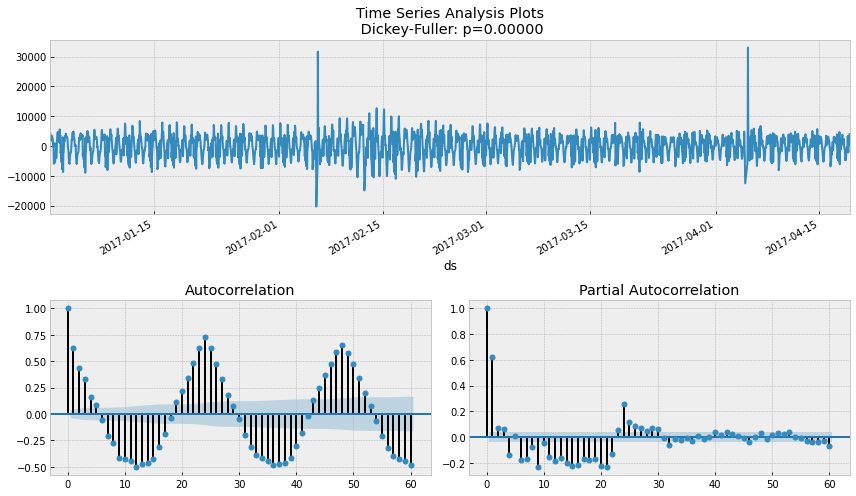

In [254]:
# Try first difference - Without season shift
train_df['frst_diff'] = train_df.y - train_df.y.shift(1)
tsplot(train_df['frst_diff'][1:], lags=60)

In [255]:
# Try first differnce after season shift
train_df['y_diff'] = train_df['y_diff'] - train_df['y_diff'].shift(1)

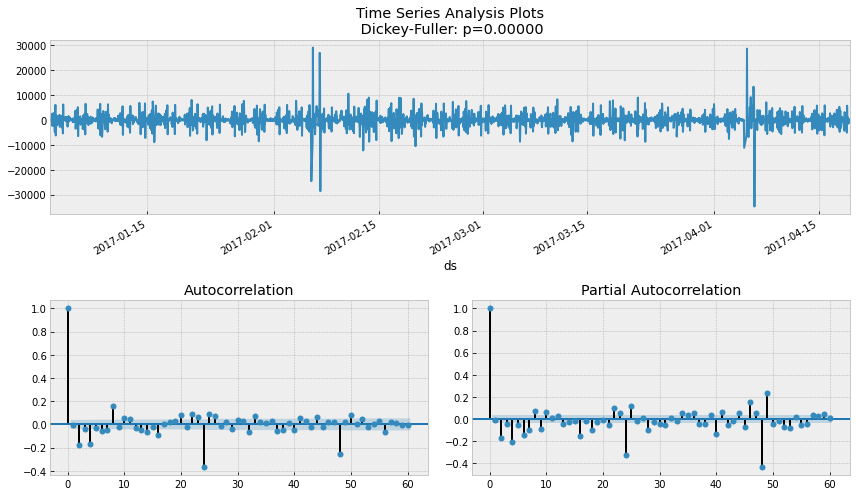

In [256]:
tsplot(train_df['y_diff'][24+1:], lags=60)

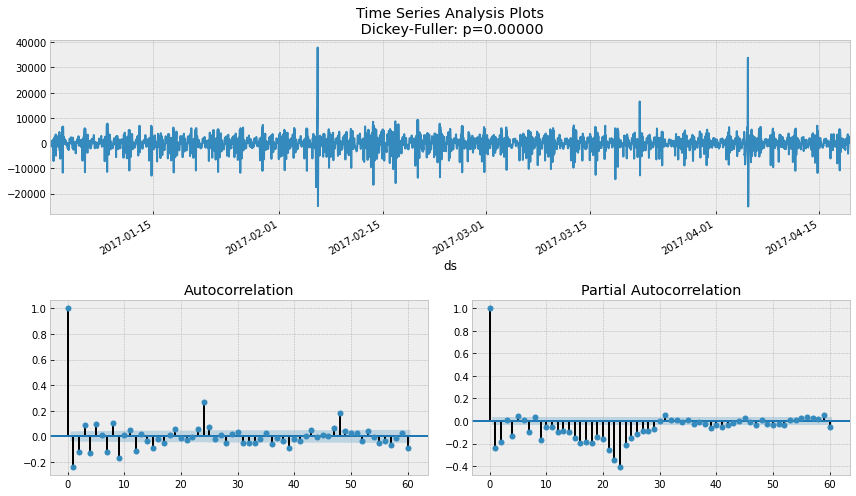

In [257]:
# Try 2nd difference - Not considering season shifting
train_df['second_diff'] = train_df.y - train_df.y.shift(1)
train_df['second_diff'] = train_df['second_diff'] - train_df['second_diff'].shift(1)
tsplot(train_df['second_diff'][2:], lags=60)

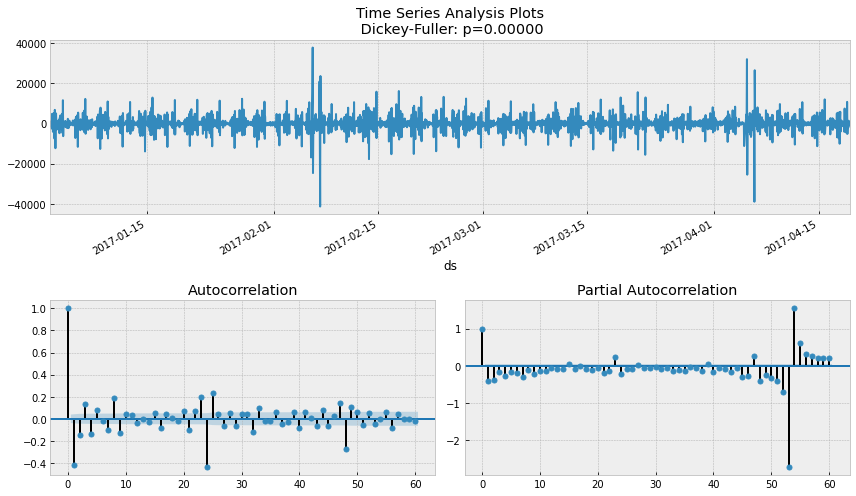

In [258]:
# Try 2nd differnce with season shift
train_df['y_diff'] = train_df['y_diff'] - train_df['y_diff'].shift(1)
tsplot(train_df['y_diff'][26:], lags=60)

In [259]:
p = range(3, 7)
d = range(0, 2)
q = range(2, 7)
P = range(1, 2)
D = range(0, 2)
Q = range(1, 2)
s= 24

In [260]:
from itertools import product

parameters = product(p, d, q, P, D, Q)
parameters_list = list(parameters)
len(parameters_list)

80

In [92]:
# From Notes
%time

from tqdm import tqdm
resultsBefore = []
best_aic = float("inf")

for param in tqdm(parameters_list):

    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], s)).fit(disp=-1)
   
    except: 
        continue
        
    aic = model.aic
   
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    resultsBefore.append([param, model.aic])

  0%|          | 0/80 [00:00<?, ?it/s]

Wall time: 0 ns


100%|██████████| 80/80 [2:14:35<00:00, 100.94s/it]  


In [261]:
result_table_Before = pd.DataFrame(resultsBefore)
result_table_Before.columns = ['parameters', 'aic']
print(result_table_Before.sort_values(by = 'aic', ascending=False).head())

            parameters           aic
0   (3, 0, 2, 1, 0, 1)  47412.033832
60  (6, 0, 2, 1, 0, 1)  47374.123661
20  (4, 0, 2, 1, 0, 1)  47368.634572
40  (5, 0, 2, 1, 0, 1)  47367.970432
50  (5, 1, 2, 1, 0, 1)  47359.897190


In [262]:
qOptions = list([(3, 0, 2, 2, 1, 1),(3, 1, 6, 2, 1, 1), (5, 1, 6, 1, 0, 1), (7, 0, 7, 2, 2, 2)])

In [263]:
result_table_Before[result_table_Before['parameters'].isin(qOptions)]

,parameters,aic
58,"(5, 1, 6, 1, 0, 1)",47215.119839


In [264]:
print("The 3rd answer seems correct: p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1")

The 3rd answer seems correct: p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1


In [266]:
#train_df.head()

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here:

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2


Now do the same, but for the series with Box-Cox transformation.

In [267]:
# Provided Code
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

# Note that lmbda varies from -5 to 5

The optimal Box-Cox transformation parameter: 0.246704


In [268]:
# 
resultsAfter = []
best_aic = float("inf")

for param in tqdm(parameters_list):
   
    try:
        model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(param[0], param[1], param[2]), 
                                        seasonal_order=(param[3], param[4], param[5], s)).fit(disp=-1)
    
    except:
        continue
    aic = model.aic
    
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    resultsAfter.append([param, model.aic])
    
warnings.filterwarnings('default')


100%|██████████| 80/80 [1:21:43<00:00, 61.30s/it]


In [269]:
result_table_After = pd.DataFrame(resultsAfter)
result_table_After.columns = ['parameters', 'aic']
print(result_table_After.sort_values(by = 'aic', ascending=False).head())

            parameters          aic
4   (3, 0, 4, 1, 0, 1)  8071.953205
8   (3, 0, 6, 1, 0, 1)  8070.728228
62  (6, 0, 3, 1, 0, 1)  8070.287853
64  (6, 0, 4, 1, 0, 1)  8068.312163
66  (6, 0, 5, 1, 0, 1)  8064.653045


In [270]:
result_table_After[result_table_After['parameters'].isin(qOptions)]

,parameters,aic
58,"(5, 1, 6, 1, 0, 1)",8010.100427


In [271]:
print("The  3rd answer seems correct: p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1")

The  3rd answer seems correct: p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1


 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [273]:
# According to the previous section
p = 5
d = 1
q = 6
P = 1
D = 0
Q = 1
s=24

#best_model=sm.tsa.statespace.SARIMAX(, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                              y_box   No. Observations:                 2586
Model:             SARIMAX(5, 1, 6)x(1, 1, 1, 24)   Log Likelihood               -3954.975
Date:                            Sun, 31 May 2020   AIC                           7937.949
Time:                                    17:05:21   BIC                           8019.823
Sample:                                         0   HQIC                          7967.637
                                           - 2586                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8278      0.041     20.396      0.000       0.748       0.907
ar.L2          0.5171      0.023   

C:\Users\Bita\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Bita\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.

C:\Users\Bita\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.

C:\Users\Bita\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning:


The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor relea

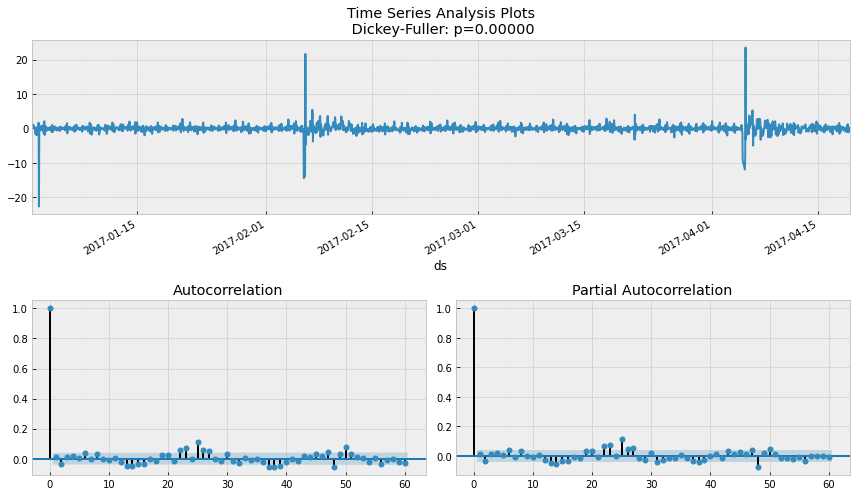

In [274]:
# Considering 1
tsplot(best_model.resid[1:], lags=60)

In [275]:
 
def inverse_boxcox(y,lmbda):
    
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))


In [ ]:
# Regarding what we have in train_df

In [ ]:
train_df['arima_model'] = inverse_boxcox(best_model.fittedvalues, lmbda)

In [277]:
train_df.head()

,y,y_diff,frst_diff,second_diff,y_box,arima_model
ds,,,,,,
2017-01-01 00:00:00,34002,NaN,NaN,NaN,49.128622,1.000000
2017-01-01 01:00:00,37947,NaN,3945.0,NaN,50.588524,34002.006479
2017-01-01 02:00:00,41517,NaN,3570.0,-375.0,51.814125,37946.971954
2017-01-01 03:00:00,44476,NaN,2959.0,-611.0,52.771128,41516.978372
2017-01-01 04:00:00,46234,NaN,1758.0,-1201.0,53.317187,44475.976770


In [281]:
tmpTrain = train_df.copy()

In [282]:
tmpTrain.head()

,y,y_diff,frst_diff,second_diff,y_box,arima_model
ds,,,,,,
2017-01-01 00:00:00,34002,NaN,NaN,NaN,49.128622,1.000000
2017-01-01 01:00:00,37947,NaN,3945.0,NaN,50.588524,34002.006479
2017-01-01 02:00:00,41517,NaN,3570.0,-375.0,51.814125,37946.971954
2017-01-01 03:00:00,44476,NaN,2959.0,-611.0,52.771128,41516.978372
2017-01-01 04:00:00,46234,NaN,1758.0,-1201.0,53.317187,44475.976770


In [283]:
# making a shift on s+d steps, because these values were unobserved by the model due to the differentiating
tmpTrain['arima_model'][:1] = np.NaN

C:\Users\Bita\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [373]:
#tmpTrain.head()
#tmpTrain.tail()
#tmpTrain.shape

In [380]:
dataTrain=tmpTrain.drop(columns=['y_diff', 'frst_diff','second_diff','y_box'])
#tmpTrain.head()
#dataTrain.head()


In [383]:
testforecast = best_model.predict(start = dataTrain.shape[0], end = dataTrain.shape[0] + predictions-1)
#testforecast

C:\Users\Bita\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [449]:
#testforecast

In [ ]:
#dataTrain

In [416]:
#testforecastLong = dataTrain.arima_model.append(testforecast)
#testforecastLong

In [333]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [355]:
# calculate error, again having shifted on s+d steps from the beginning 
# This is taken from notes, and it seems to be the training accuracy
error = mean_absolute_percentage_error(dataTrain['y'][d:], dataTrain['arima_model'][d:])

In [356]:
print("The training error is ", error)

The training error is  4.749349780537395


In [407]:
dataTrain.reset_index(inplace=True)

In [415]:
#dataTrain.head()

In [409]:
dataTrain = dataTrain.set_index('ds')

In [412]:
pd.plotting.register_matplotlib_converters()

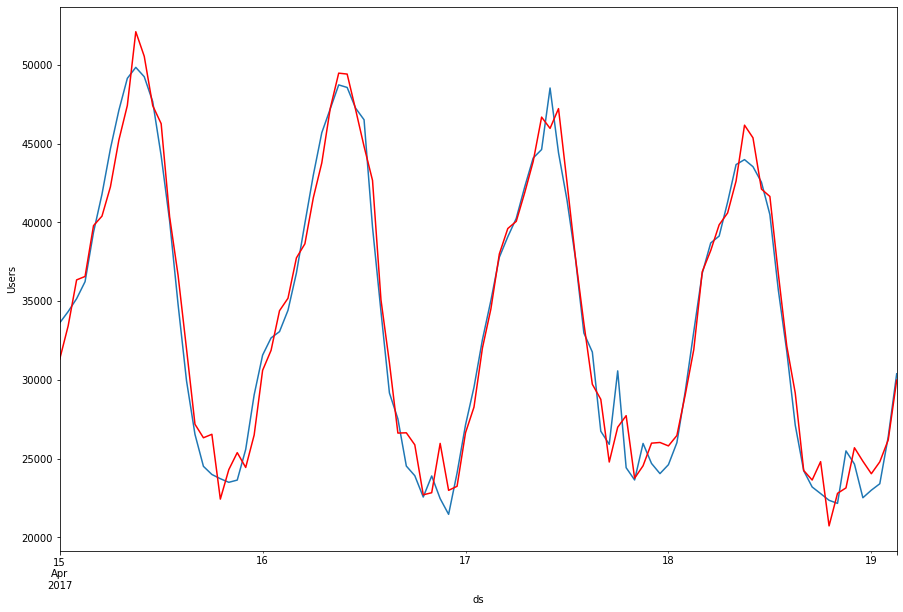

In [414]:
dataTrain.y.tail(100).plot()
dataTrain.arima_model[1:].tail(100).plot(color='r')
plt.ylabel('Users');

In [419]:
# Unfortunately, this keeps giving errors for no reason
#plt.figure(figsize=(15, 7))
#plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
#plt.plot(testforecastLong, color='r', label="model")
#plt.axvspan(dataTrain.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
#plt.plot(data.actual, label="actual")
#plt.legend()
#plt.grid(True);


In [ ]:
#df['C'] = np.arange(len(df))

In [338]:
# But since we have the actual labels in df, we could also compare the test accuracy

In [462]:
predictedDF = pd.Series(testforecast)

In [463]:
#predictedDF

In [476]:
#dataTest=df.iloc[-predictions:]
#dataTest.head()
#dataTest.tail()
#dataTest.shape

In [475]:
temp=pd.Series(inverse_boxcox(predictedDF, lmbda))

In [468]:
dataTest['forecast']=temp.values

In [469]:
dataTest.head()

,index,y,forecast
ds,,,
2017-04-19 04:00:00,2595,35175,33855.649317
2017-04-19 05:00:00,2596,37794,35862.537648
2017-04-19 06:00:00,2597,37808,37227.944715
2017-04-19 07:00:00,2598,39964,38436.743968
2017-04-19 08:00:00,2599,41812,40466.880549


In [471]:
errorTest = mean_absolute_percentage_error(dataTest['y'], dataTest['forecast'])
print("The test error is", errorTest)

The test error is 5.081847090036525


In [472]:
dataTest.reset_index(inplace=True)

In [473]:
dataTest= dataTest.set_index('ds')

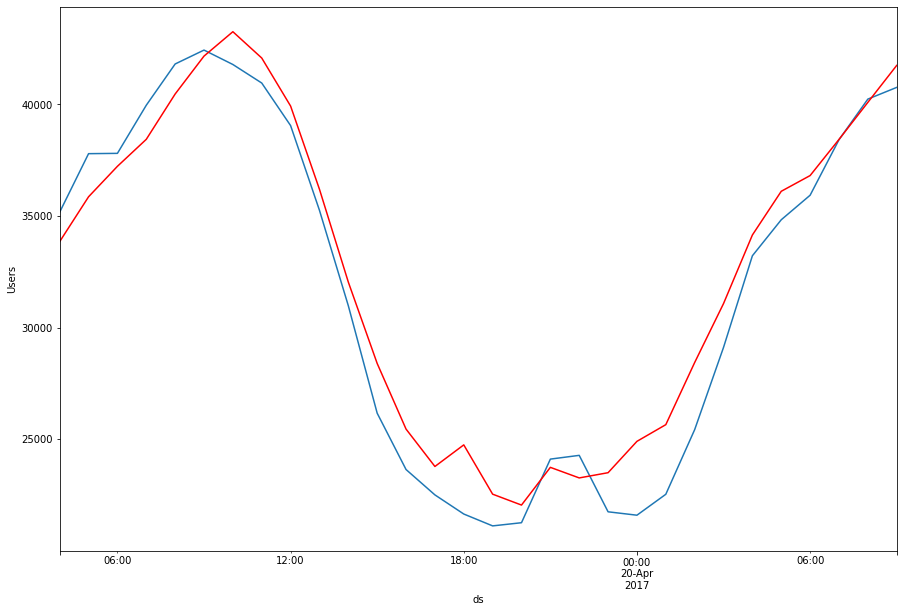

In [474]:
dataTest.y.plot()
dataTest.forecast.plot(color='r')
plt.ylabel('Users');